In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.6.4'

In [4]:
train_data=pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/train.csv')
test_data=pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/test.csv')

In [5]:
train_data.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
train_data.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target'],
      dtype='object')

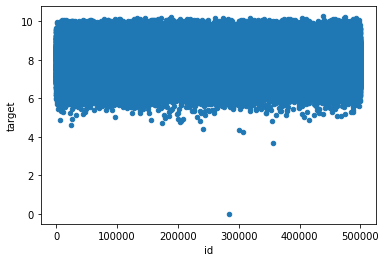

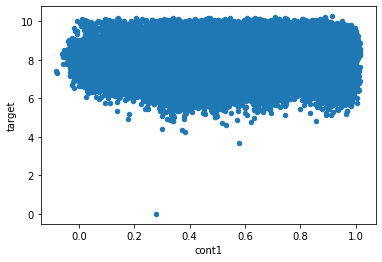

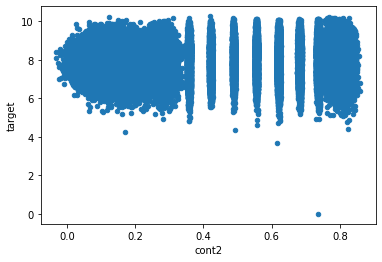

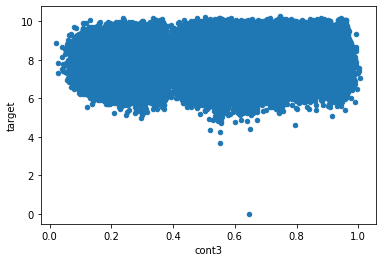

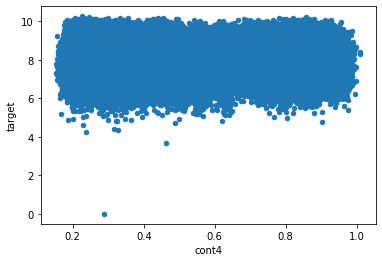

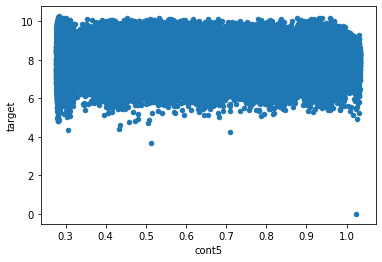

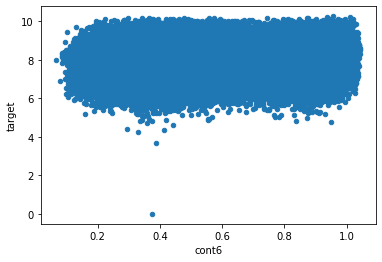

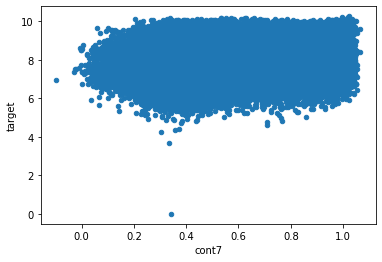

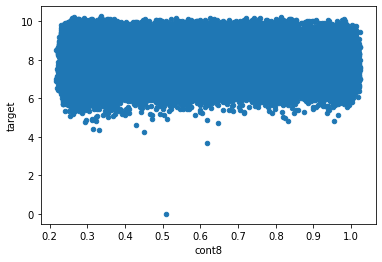

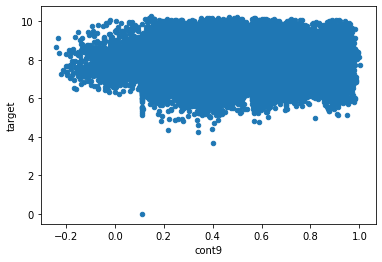

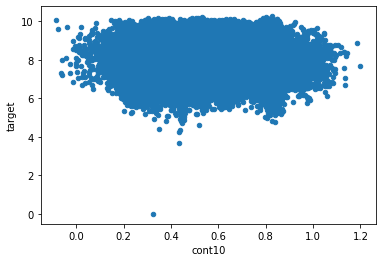

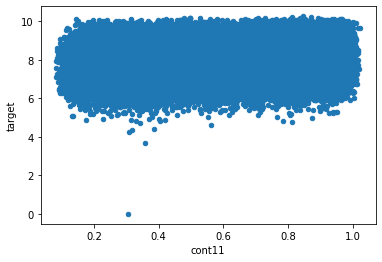

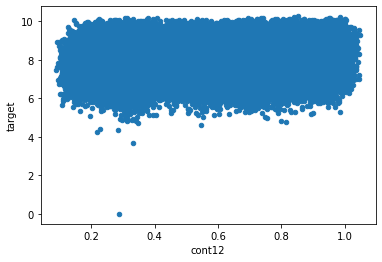

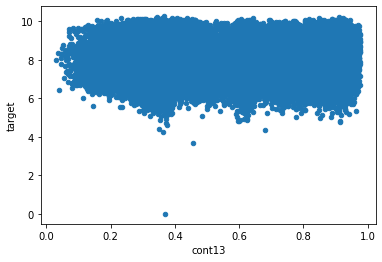

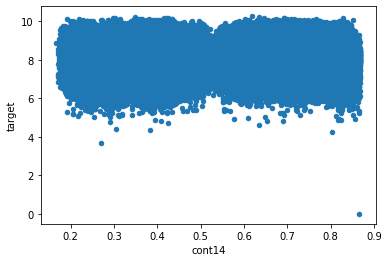

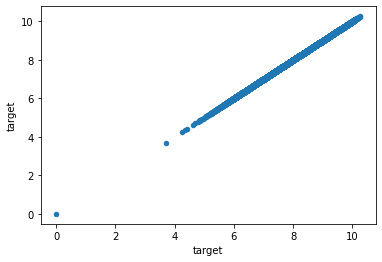

In [8]:
for col in train_data.columns:
    train_data.plot.scatter(col, 'target')

In [9]:
y = train_data['target']
X_cols = [col for col in train_data.columns if col not in ['id', 'target']]
X = train_data[X_cols]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

2022-10-24 18:11:27.120889: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-24 18:11:27.311430: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
7032/7032 [==============================] - 11s 2ms/step - loss: 0.9969 - val_loss: 0.5644
Epoch 2/20
7032/7032 [==============================] - 10s 1ms/step - loss: 0.5436 - val_loss: 0.5258
Epoch 3/20
7032/7032 [==============================] - 11s 2ms/step - loss: 0.5289 - val_loss: 0.5200
Epoch 4/20
7032/7032 [==============================] - 10s 1ms/step - loss: 0.5246 - val_loss: 0.5238
Epoch 5/20
7032/7032 [==============================] - 10s 1ms/step - loss: 0.5227 - val_loss: 0.5184
Epoch 6/20
7032/7032 [==============================] - 11s 2ms/step - loss: 0.5213 - val_loss: 0.5162
Epoch 7/20
7032/7032 [==============================] - 11s 2ms/step - loss: 0.5205 - val_loss: 0.5151
Epoch 8/20
7032/7032 [==============================] - 10s 1ms/step - loss: 0.5198 - val_loss: 0.5159
Epoch 9/20
7032/7032 [==============================] - 11s 2ms/step - loss: 0.5194 - val_loss: 0.5195
Epoch 10/20
7032/7032 [==============================] - 10s 1ms/step - l

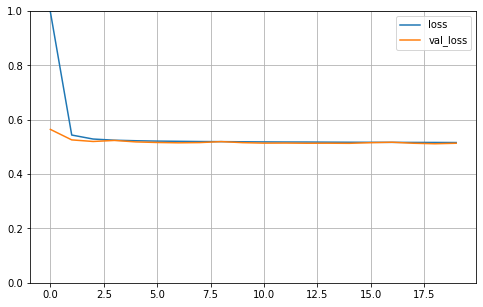

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.save("tab_pg_jan_2021_model.h5")

## Optimization of Learning Rate

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
def build_model(n_hidden=2, n_neurons=30, learning_rate=3e-3, input_shape=X_train.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [18]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [19]:
param_distribs = {"learning_rate" : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

grid_search_cv = GridSearchCV(keras_reg, param_distribs, cv=3, verbose=2)
grid_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Epoch 1/100
4688/4688 [==============================] - 8s 2ms/step - loss: 28.5450 - val_loss: 6.7753
Epoch 2/100
4688/4688 [==============================] - 8s 2ms/step - loss: 4.3192 - val_loss: 3.3253
Epoch 3/100
4688/4688 [==============================] - 8s 2ms/step - loss: 2.8912 - val_loss: 2.5534
Epoch 4/100
4688/4688 [==============================] - 8s 2ms/step - loss: 2.3262 - val_loss: 2.1368
Epoch 5/100
4688/4688 [==============================] - 8s 2ms/step - loss: 1.9997 - val_loss: 1.8772
Epoch 6/100
4688/4688 [==============================] - 8s 2ms/step - loss: 1.7866 - val_loss: 1.6996
Epoch 7/100
4688/4688 [==============================] - 8s 2ms/step - loss: 1.6360 - val_loss: 1.5699
Epoch 8/100
4688/4688 [==============================] - 8s 2ms/step - loss: 1.5231 - val_loss: 1.4704
Epoch 9/100
4688/4688 [==============================] - 8s 2ms/step - loss: 1.4344 - val_loss: 1.3909
Epoch 10/100

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-0.60202857 -0.52043339 -0.51759456 -0.52530583 -0.51543999         nan
         nan]
  category=UserWarning,


7032/7032 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
7032/7032 [==============================] - 11s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
7032/7032 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
7032/7032 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
7032/7032 [==============================] - 11s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
7032/7032 [==============================] - 11s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
7032/7032 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
7032/7032 [==============================] - 11s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
7032/7032 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
7032/7032 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f30b5f7cc10>,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                           10]},
             verbose=2)

In [20]:
best_lr = grid_search_cv.best_params_
best_lr

{'learning_rate': 0.1}

In [21]:
best_score = grid_search_cv.best_score_
best_score

-0.5154399871826172